In [1]:
import os
os.getcwd()

'/Users/DRN/DSI-CHI-1'

In [4]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
os.listdir('/Users/DRN/datasets/')

['divvy.csv', 'Iowa_Liquor_Sales.csv']

In [8]:
df = pd.read_csv('/Users/DRN/datasets/divvy.csv')

/anaconda/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
df.head(5)

,bikeid,birthday,birthyear,from_station_id,from_station_name,gender,starttime,stoptime,to_station_id,to_station_name,trip_id,tripduration,usertype
0,480,NaN,NaN,85,Michigan Ave & Oak St,NaN,2013-06-27 12:11,2013-06-27 12:16,28,Larrabee St & Menomonee St,4118,316,Customer
1,77,NaN,NaN,32,Racine Ave & Congress Pkwy,NaN,2013-06-27 14:44,2013-06-27 14:45,32,Racine Ave & Congress Pkwy,4275,64,Customer
2,77,NaN,NaN,32,Racine Ave & Congress Pkwy,NaN,2013-06-27 14:58,2013-06-27 15:05,19,Loomis St & Taylor St,4291,433,Customer
3,77,NaN,NaN,19,Loomis St & Taylor St,NaN,2013-06-27 15:06,2013-06-27 15:09,19,Loomis St & Taylor St,4316,123,Customer
4,77,NaN,NaN,19,Loomis St & Taylor St,NaN,2013-06-27 15:13,2013-06-27 15:27,55,Halsted St & James M Rochford St,4342,852,Customer


In [13]:
df['bikeid'].value_counts().head()

872     2820
478     2814
267     2757
94      2745
1329    2739
Name: bikeid, dtype: int64

In [14]:
df['from_station_name'].value_counts().head()

Streeter Dr & Illinois St       137683
Lake Shore Dr & Monroe St       124674
Clinton St & Washington Blvd    112140
Theater on the Lake             108426
Michigan Ave & Oak St           101762
Name: from_station_name, dtype: int64

In [15]:
df['to_station_name'].value_counts().head()

Streeter Dr & Illinois St       164101
Lake Shore Dr & Monroe St       122493
Theater on the Lake             115330
Clinton St & Washington Blvd    110611
Millennium Park                 110085
Name: to_station_name, dtype: int64

In [17]:
departure_arrival = pd.DataFrame(df['from_station_name'].value_counts()).join(df['to_station_name'].value_counts())

In [18]:
departure_arrival.head()

,from_station_name,to_station_name
Streeter Dr & Illinois St,137683,164101.0
Lake Shore Dr & Monroe St,124674,122493.0
Clinton St & Washington Blvd,112140,110611.0
Theater on the Lake,108426,115330.0
Michigan Ave & Oak St,101762,109586.0


In [19]:
departure_arrival['net_departures'] = departure_arrival['from_station_name'] - departure_arrival['to_station_name']

In [20]:
departure_arrival.sort_values(by='net_departures', ascending=False).head()

,from_station_name,to_station_name,net_departures
Columbus Dr & Randolph St,70126,47723.0,22403.0
Canal St & Monroe St,34496,22198.0,12298.0
Clinton St & Madison St,71598,63789.0,7809.0
Stetson Ave & South Water St,31514,23837.0,7677.0
Desplaines St & Kinzie St,46823,41509.0,5314.0


In [21]:
departure_arrival.sort_values(by='net_departures').head()

,from_station_name,to_station_name,net_departures
Streeter Dr & Illinois St,137683,164101.0,-26418.0
Lake Shore Dr & North Blvd,90112,101364.0,-11252.0
Canal St & Madison St,86289,96899.0,-10610.0
Millennium Park,100545,110085.0,-9540.0
Michigan Ave & Oak St,101762,109586.0,-7824.0


(array([ 389.,  101.,   47.,   22.,   11.,    2.,    3.,    3.,    1.,    2.]),
 array([  1.00000000e+00,   1.37692000e+04,   2.75374000e+04,
          4.13056000e+04,   5.50738000e+04,   6.88420000e+04,
          8.26102000e+04,   9.63784000e+04,   1.10146600e+05,
          1.23914800e+05,   1.37683000e+05]),
 <a list of 10 Patch objects>)

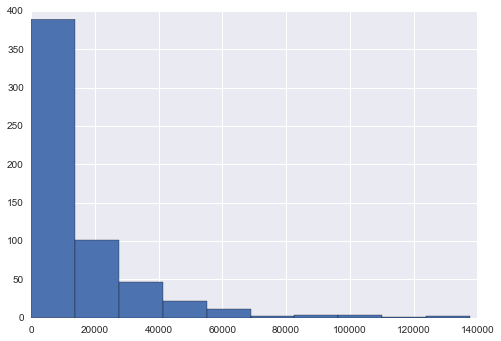

In [22]:
plt.hist(departure_arrival['from_station_name'])

In [23]:
departure_arrival.fillna(0, inplace=True)

In [25]:
departure_arrival.count()

from_station_name    581
to_station_name      581
net_departures       581
dtype: int64

In [ ]:
departure_arrival['net_departures'] = departure_arrival['from_station_name'] - departure_arrival['to_station_name']

(array([ 158.,   53.,   32.,   26.,   26.,   14.,   22.,   28.,   19.,
          11.,   20.,   12.,    9.,    7.,   14.,    7.,    9.,    9.,
           3.,   11.,    8.,    1.,    6.,   10.,    8.,    3.,    3.,
           4.,    3.,    1.,    2.,    4.,    3.,    2.,    2.,    4.,
           1.,    2.,    0.,    2.,    1.,    1.,    2.,    1.,    2.,
           0.,    1.,    2.,    0.,    1.,    1.,    0.,    1.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,
           0.,    1.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    2.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,
           1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  1.00000000e+00,   1.37782000e+03,   2.75464000e+03,
          4.13146000e+03,   5.50828000e+03,   6.88510000e+03,
          8.26192000e+03,   9.63874000e+03,   1.10155600e+04,
          1.23923800e+04

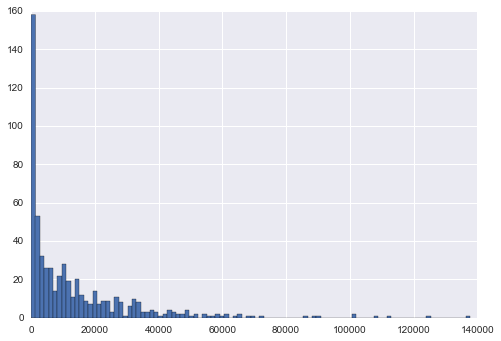

In [26]:
plt.hist(departure_arrival['from_station_name'], bins=100)

In [27]:
departure_arrival.sort_values(by='from_station_name').head()

,from_station_name,to_station_name,net_departures
Elizabeth St & 47th St,1,0.0,0.0
Normal Ave & 72nd St,1,1.0,0.0
Central St Metra,1,1.0,0.0
Racine Ave & Garfield Blvd,1,1.0,0.0
Ashland Ave & 69th St,1,3.0,-2.0


(array([ 164.,   62.,   31.,   39.,   13.,   26.,   32.,   19.,   23.,
          12.,   10.,   12.,   12.,   12.,    7.,    9.,    7.,    9.,
           3.,   13.,   10.,    3.,    5.,    1.,    2.,    5.,    4.,
           2.,    2.,    5.,    3.,    1.,    1.,    1.,    3.,    1.,
           2.,    1.,    2.,    1.,    1.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,
           0.,    0.,    0.,    0.,    0.,    1.,    0.,    1.,    0.,
           0.,    0.,    0.,    1.,    2.,    0.,    0.,    1.,    0.,
           0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([      0.  ,    1641.01,    3282.02,    4923.03,    6564.04,
           8205.05,    9846.06,   11487.07,   13128.08,   14769.09,
          16410.1 ,   18051.11,   19692.12,   21333.13,   22974.14,
      

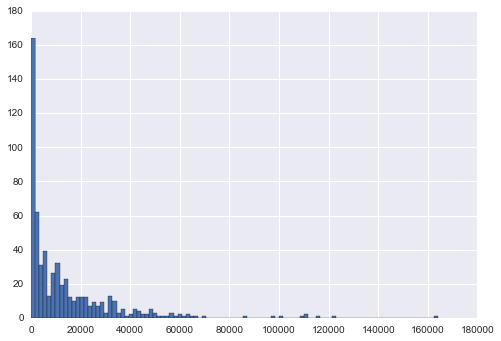

In [28]:
plt.hist(departure_arrival['to_station_name'], bins=100)

In [29]:
departure_arrival.sort_values(by='to_station_name').head()

,from_station_name,to_station_name,net_departures
Elizabeth St & 47th St,1,0.0,0.0
Marion St & South Blvd,3,0.0,0.0
State St & 76th St,1,1.0,0.0
Throop St & 52nd St,1,1.0,0.0
Racine Ave & Garfield Blvd,1,1.0,0.0


(array([   1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.,    1.,    0.,    1.,    0.,
           0.,    0.,    1.,    1.,    0.,    0.,    1.,    0.,    1.,
           2.,    1.,    1.,    3.,    8.,    7.,   24.,   29.,  135.,
         255.,   52.,   14.,   10.,   12.,    6.,    1.,    3.,    2.,
           3.,    1.,    0.,    0.,    0.,    0.,    1.,    1.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([-26418.  , -25929.79, -25441.58, -24953.37, -24465.16, -23976.95,
        -23488.74, -23000.53, -22512.32, -22024.11, -21535.9 , -21047.69,
        -20559.48, -20071.27, -19583.06, -19094.85, -18606.64,

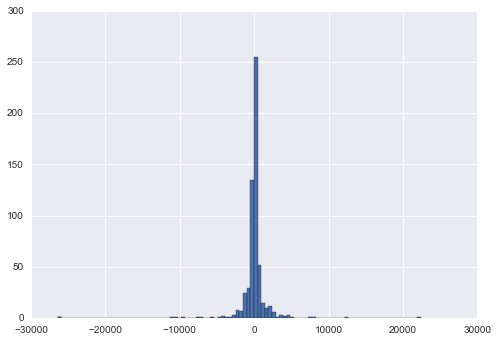

In [33]:
plt.hist(departure_arrival['net_departures'], bins=100)

In [34]:
departure_arrival['net_departures'].describe()

count      581.000000
mean        -0.005164
std       2082.847602
min     -26418.000000
25%       -217.000000
50%          0.000000
75%        222.000000
max      22403.000000
Name: net_departures, dtype: float64

In [35]:
df.columns

Index([u'bikeid', u'birthday', u'birthyear', u'from_station_id',
       u'from_station_name', u'gender', u'starttime', u'stoptime',
       u'to_station_id', u'to_station_name', u'trip_id', u'tripduration',
       u'usertype'],
      dtype='object')

In [36]:
df['tripduration'].describe()

count    7.867601e+06
mean     1.035279e+03
std      2.063022e+03
min      6.000000e+01
25%      4.220000e+02
50%      7.300000e+02
75%      1.216000e+03
max      8.639900e+04
Name: tripduration, dtype: float64

In [40]:
df['tripduration'].isnull().sum()

0

In [41]:
df['tripduration'].isnull().any()

False

(array([  4.84321500e+06,   2.29507500e+06,   4.15107000e+05,
          1.29172000e+05,   5.97390000e+04,   3.51950000e+04,
          2.22590000e+04,   1.51910000e+04,   1.03980000e+04,
          7.24800000e+03,   5.37500000e+03,   4.15900000e+03,
          3.13500000e+03,   2.36100000e+03,   1.96400000e+03,
          1.67000000e+03,   1.31800000e+03,   1.11600000e+03,
          9.26000000e+02,   7.65000000e+02,   6.08000000e+02,
          5.99000000e+02,   5.10000000e+02,   4.59000000e+02,
          3.82000000e+02,   3.67000000e+02,   3.12000000e+02,
          2.69000000e+02,   2.77000000e+02,   2.18000000e+02,
          2.08000000e+02,   2.07000000e+02,   1.92000000e+02,
          1.69000000e+02,   1.89000000e+02,   1.64000000e+02,
          1.69000000e+02,   1.90000000e+02,   1.69000000e+02,
          1.53000000e+02,   1.35000000e+02,   1.43000000e+02,
          1.38000000e+02,   1.41000000e+02,   1.27000000e+02,
          1.38000000e+02,   1.31000000e+02,   1.09000000e+02,
        

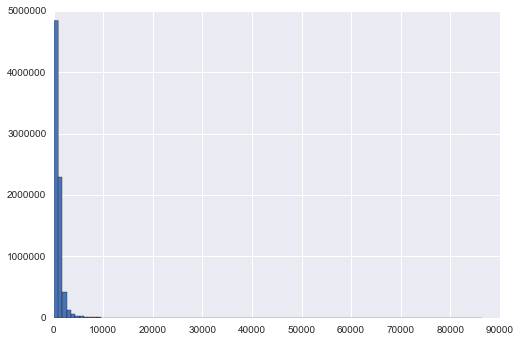

In [43]:
plt.hist(df['tripduration'], bins=100)

(0, 1800)

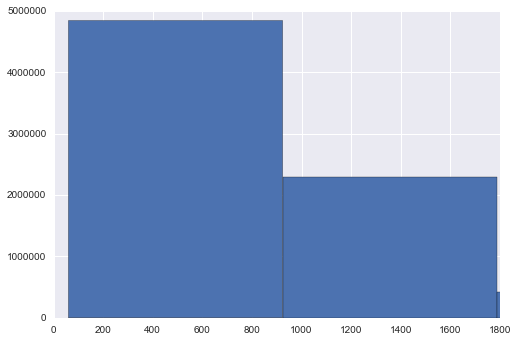

In [44]:
plt.hist(df['tripduration'], bins=100)
plt.xlim(0, 1800)

In [ ]:
plt.hist(df['tripduration'], bins=100)
plt.xlim(0, 1800)

In [45]:
df[(df['tripduration'] <= 1800.0)]['tripduration']

0           316
1            64
2           433
3           123
4           852
6          1094
7          1020
9           653
10         1738
12         1712
13          996
14          818
16          730
17         1292
18         1511
19         1512
20         1125
21          964
22          972
23          977
26         1758
27          730
30         1117
31          980
32         1642
35          423
38          944
39         1656
40          736
41          223
           ... 
7867571     871
7867572    1698
7867573     522
7867574    1320
7867575    1335
7867576    1707
7867577     469
7867578    1254
7867579    1178
7867580     404
7867581    1652
7867582    1322
7867583    1342
7867584     423
7867585     117
7867586     372
7867587     381
7867588     282
7867589     253
7867590     609
7867591    1540
7867592    1613
7867593     721
7867594     704
7867595     590
7867596     484
7867597     512
7867598     744
7867599     615
7867600     508
Name: tripduration, dtyp

(array([  13044.,   15049.,   25822.,   37343.,   49667.,   67006.,
          76123.,   93060.,   97456.,  105284.,  118877.,  118166.,
         130365.,  125873.,  127730.,  135669.,  129926.,  136540.,
         128147.,  127271.,  133963.,  125199.,  130722.,  122180.,
         120388.,  125586.,  115859.,  120413.,  111503.,  109629.,
         113356.,  104342.,  108486.,   99805.,   97779.,  101538.,
          93661.,   96684.,   89465.,   87536.,   90553.,   83489.,
          86743.,   80276.,   79109.,   82147.,   75975.,   78639.,
          73350.,   71844.,   75019.,   68821.,   71854.,   66347.,
          65063.,   67860.,   62754.,   65043.,   60607.,   59475.,
          62269.,   57813.,   59945.,   55568.,   55182.,   56438.,
          52525.,   54895.,   50765.,   50007.,   52298.,   48735.,
          50107.,   46550.,   45585.,   47460.,   43691.,   45364.,
          41547.,   40744.,   42132.,   38598.,   40008.,   36556.,
          35848.,   36040.,   33133.,   34042., 

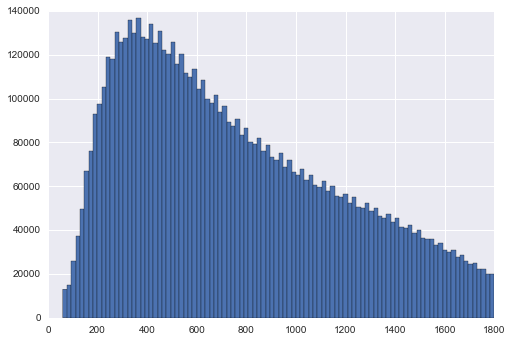

In [46]:
plt.hist(df[(df['tripduration'] <= 1800.0)]['tripduration'], bins=100)

(array([      0.,       0.,       0.,    8761.,   14203.,   22559.,
          35809.,   49983.,   64302.,   78823.,   91694.,  102580.,
         111140.,  118877.,  125463.,  130320.,  133743.,  135044.,
         136272.,  137197.,  136403.,  135523.,  134428.,  133360.,
         131948.,  130493.,  128769.,  126404.,  124065.,  121629.,
         118684.,  116624.,  114650.,  111471.,  108969.,  106218.,
         104180.,  101914.,   99175.,   97167.,   95006.,   92662.,
          90553.,   88382.,   86620.,   84778.,   83634.,   81798.,
          80103.,   78493.,   77127.,   75820.,   74359.,   72187.,
          71507.,   69601.,   68239.,   67340.,   65509.,   64585.,
          63313.,   62746.,   61697.,   59987.,   59386.,   58454.,
          56596.,   55742.,   54956.,   53895.,   52968.,   52298.,
          51593.,   49994.,   49233.,   48104.,   47167.,   46153.,
          45149.,   43666.,   42903.,   41314.,   40917.,   39596.,
          38322.,   36958.,   35499.,   34631., 

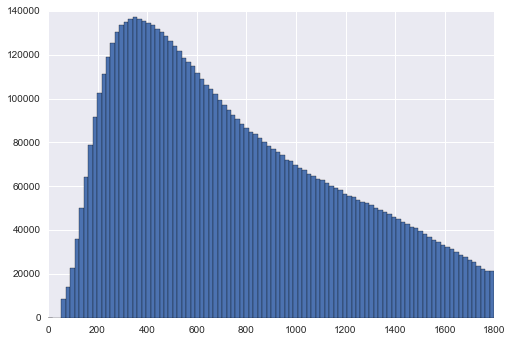

In [50]:
#Nick code to do the same thing above (slight differences due to range)
plt.hist(df['tripduration'], bins=100, range=[0, 1800])

(array([  29216.,   64616.,  122366.,  172014.,  211059.,  246325.,
         257511.,  271782.,  265769.,  262466.,  265308.,  252174.,
         250798.,  234084.,  225204.,  221556.,  205397.,  202057.,
         188110.,  178936.,  176788.,  164747.,  163298.,  152176.,
         147450.,  145242.,  135495.,  134411.,  125650.,  121744.,
         120987.,  113890.,  111793.,  105356.,  101953.,  101238.,
          94359.,   93237.,   86142.,   81757.,   80513.,   73202.,
          70311.,   63818.,   59685.,   56829.,   50734.,   46877.,
          40835.,   37002.,   34085.,   29316.,   27557.,   24561.,
          22248.,   21162.,   18990.,   18088.,   16580.,   15529.,
          14825.,   13678.,   13169.,   12031.,   11418.,   10979.,
          10428.,   10032.,    9264.,    8876.,    8800.,    8112.,
           8031.,    7678.,    7256.,    7139.,    6666.,    6742.,
           6276.,    6128.,    6143.,    5813.,    5564.,    5371.,
           5304.,    5226.,    4946.,    4906., 

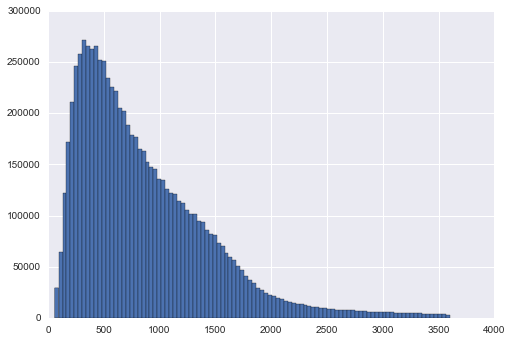

In [51]:
plt.hist(df[(df['tripduration'] <= 3600.0)]['tripduration'], bins=100)

(array([ 19217.,  18183.,  17159.,  16233.,  15251.,  14472.,  13802.,
         13231.,  12716.,  11996.,  11592.,  10835.,  10611.,  10199.,
          9696.,   9319.,   8975.,   8839.,   8537.,   8234.,   7966.,
          7573.,   7371.,   7201.,   6983.,   6761.,   6539.,   6335.,
          6097.,   5993.,   5858.,   5658.,   5379.,   5389.,   5358.,
          5067.,   4962.,   4856.,   4735.,   4618.,   4507.,   4411.,
          4389.,   4239.,   4101.,   4120.,   3919.,   3993.,   3890.,
          3747.,   3656.,   3675.,   3461.,   3445.,   3386.,   3402.,
          3340.,   3202.,   3216.,   3099.,   3137.,   3070.,   3116.,
          2999.,   2838.,   2810.,   2770.,   2785.,   2760.,   2758.,
          2571.,   2726.,   2552.,   2475.,   2480.,   2444.,   2401.,
          2371.,   2340.,   2312.,   2223.,   2300.,   2233.,   2190.,
          2190.,   2135.,   2090.,   1974.,   2048.,   2019.,   1913.,
          1928.,   1828.,   1800.,   1766.,   1868.,   1799.,   1749.,
      

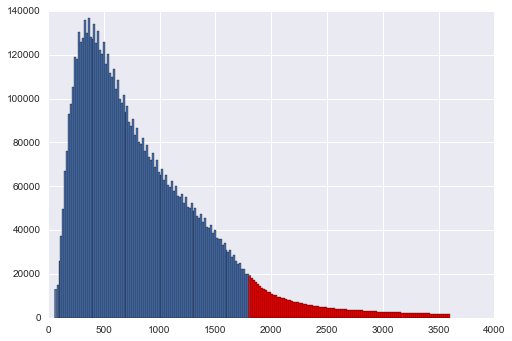

In [52]:
plt.hist(df[(df['tripduration'] <= 1800.0)]['tripduration'], bins=100)
plt.hist(df[(df['tripduration'] >= 1800.0) & (df['tripduration'] <= 3600.0)]['tripduration'], bins=100, color='r')

In [ ]:
plt.hist(df[(df['tripduration'] <= 1800.0)]['tripduration'], bins=100)
plt.hist(df[(df['tripduration'] >= 1800.0) & (df['tripduration'] <= 3600.0)]['tripduration'], bins=100, color='r')

In [54]:
df['usertype'].value_counts()

Subscriber    5466758
Customer      2400700
Dependent         143
Name: usertype, dtype: int64

In [58]:
no_dependents = df.copy()
no_dependents = no_dependents[(no_dependents['usertype'] != 'Dependent')]
print no_dependents.count()

bikeid               7867458
birthday              402909
birthyear            5063774
from_station_id      7867458
from_station_name    7867458
gender               5466497
starttime            7867458
stoptime             7867458
to_station_id        7867458
to_station_name      7867458
trip_id              7867458
tripduration         7867458
usertype             7867458
dtype: int64


In [61]:
no_dependents['usertype'].value_counts()

Subscriber    5466758
Customer      2400700
Name: usertype, dtype: int64

In [65]:
import math

no_dependents['minutes'] = no_dependents['tripduration'].apply(lambda x: math.floor(x / 60.0))

In [67]:
no_dependents['minutes'].describe()

count    7.867458e+06
mean     1.676345e+01
std      3.438507e+01
min      1.000000e+00
25%      7.000000e+00
50%      1.200000e+01
75%      2.000000e+01
max      1.439000e+03
Name: minutes, dtype: float64

In [68]:
no_dependents['minutes'].head()

0     5.0
1     1.0
2     7.0
3     2.0
4    14.0
Name: minutes, dtype: float64

In [69]:
usertypes = pd.get_dummies(no_dependents['usertype'])
usertypes.head()

,Customer,Subscriber
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [70]:
no_dependents = no_dependents.join(usertypes)
no_dependents.head()

,bikeid,birthday,birthyear,from_station_id,from_station_name,gender,starttime,stoptime,to_station_id,to_station_name,trip_id,tripduration,usertype,minutes,Customer,Subscriber
0,480,NaN,NaN,85,Michigan Ave & Oak St,NaN,2013-06-27 12:11,2013-06-27 12:16,28,Larrabee St & Menomonee St,4118,316,Customer,5.0,1.0,0.0
1,77,NaN,NaN,32,Racine Ave & Congress Pkwy,NaN,2013-06-27 14:44,2013-06-27 14:45,32,Racine Ave & Congress Pkwy,4275,64,Customer,1.0,1.0,0.0
2,77,NaN,NaN,32,Racine Ave & Congress Pkwy,NaN,2013-06-27 14:58,2013-06-27 15:05,19,Loomis St & Taylor St,4291,433,Customer,7.0,1.0,0.0
3,77,NaN,NaN,19,Loomis St & Taylor St,NaN,2013-06-27 15:06,2013-06-27 15:09,19,Loomis St & Taylor St,4316,123,Customer,2.0,1.0,0.0
4,77,NaN,NaN,19,Loomis St & Taylor St,NaN,2013-06-27 15:13,2013-06-27 15:27,55,Halsted St & James M Rochford St,4342,852,Customer,14.0,1.0,0.0


In [71]:
no_dependents.groupby('minutes')['Customer'].sum()

minutes
1.0       11774.0
2.0       12694.0
3.0       18447.0
4.0       26803.0
5.0       34227.0
6.0       42052.0
7.0       49372.0
8.0       55955.0
9.0       61414.0
10.0      65174.0
11.0      69195.0
12.0      71453.0
13.0      74183.0
14.0      76212.0
15.0      78379.0
16.0      80074.0
17.0      81286.0
18.0      82635.0
19.0      83696.0
20.0      82701.0
21.0      83495.0
22.0      82488.0
23.0      80318.0
24.0      78146.0
25.0      73964.0
26.0      69233.0
27.0      64424.0
28.0      58353.0
29.0      50364.0
30.0      43830.0
           ...   
1410.0        4.0
1411.0        5.0
1412.0        2.0
1413.0        5.0
1414.0        3.0
1415.0        7.0
1416.0       11.0
1417.0        4.0
1418.0        5.0
1419.0        3.0
1420.0       14.0
1421.0        6.0
1422.0       14.0
1423.0        8.0
1424.0        9.0
1425.0        7.0
1426.0        3.0
1427.0        4.0
1428.0        2.0
1429.0        7.0
1430.0        8.0
1431.0        5.0
1432.0        1.0
1433.0        6.0
14

In [72]:
pd.pivot_table(no_dependents, index='minutes', values='Customer', aggfunc=sum)

minutes
1.0       11774.0
2.0       12694.0
3.0       18447.0
4.0       26803.0
5.0       34227.0
6.0       42052.0
7.0       49372.0
8.0       55955.0
9.0       61414.0
10.0      65174.0
11.0      69195.0
12.0      71453.0
13.0      74183.0
14.0      76212.0
15.0      78379.0
16.0      80074.0
17.0      81286.0
18.0      82635.0
19.0      83696.0
20.0      82701.0
21.0      83495.0
22.0      82488.0
23.0      80318.0
24.0      78146.0
25.0      73964.0
26.0      69233.0
27.0      64424.0
28.0      58353.0
29.0      50364.0
30.0      43830.0
           ...   
1410.0        4.0
1411.0        5.0
1412.0        2.0
1413.0        5.0
1414.0        3.0
1415.0        7.0
1416.0       11.0
1417.0        4.0
1418.0        5.0
1419.0        3.0
1420.0       14.0
1421.0        6.0
1422.0       14.0
1423.0        8.0
1424.0        9.0
1425.0        7.0
1426.0        3.0
1427.0        4.0
1428.0        2.0
1429.0        7.0
1430.0        8.0
1431.0        5.0
1432.0        1.0
1433.0        6.0
14

In [73]:
customers_by_minutes = no_dependents.groupby('minutes')['Customer'].sum()
subscribers_by_minutes = no_dependents.groupby('minutes')['Subscriber'].sum()

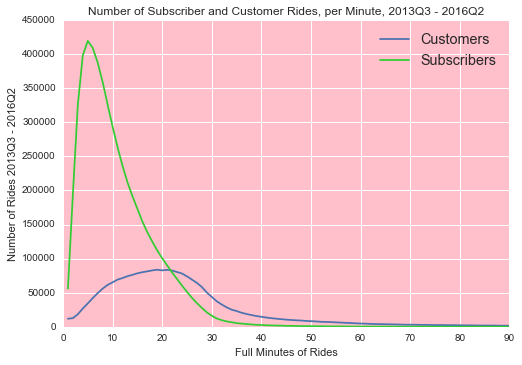

In [82]:
plt.axes(axisbg='pink')
plt.plot(customers_by_minutes, label='Customers')
plt.plot(subscribers_by_minutes, color='limegreen', label='Subscribers')
plt.xlim(0, 90)
plt.ylabel('Number of Rides 2013Q3 - 2016Q2')
plt.xlabel('Full Minutes of Rides')
plt.title('Number of Subscriber and Customer Rides, per Minute, 2013Q3 - 2016Q2')
plt.legend(loc='upper right', shadow=True, fontsize='large')

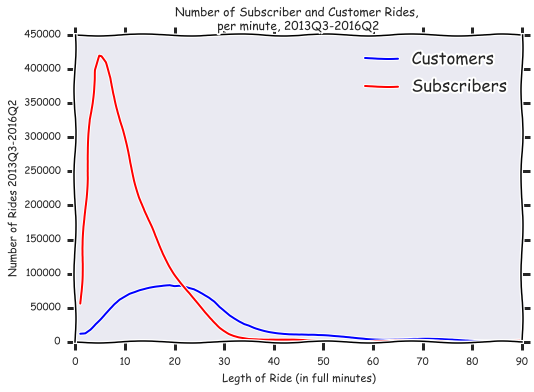

In [83]:
plt.xkcd()
plt.plot(customers_by_minutes, label='Customers')
plt.plot(subscribers_by_minutes, label='Subscribers')
plt.xlim(0, 90)
plt.ylabel("Number of Rides 2013Q3-2016Q2")
plt.xlabel("Legth of Ride (in full minutes)")
plt.title("Number of Subscriber and Customer Rides, \nper minute, 2013Q3-2016Q2")
plt.legend(loc='upper right', shadow=True, fontsize='large')